In [3]:
import numpy as np
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datafilereader import DataFileReader
from sklearn.multiclass import OneVsRestClassifier

folder = "./dataset"

labels = ["unknown", "5_CTS", "10_CTS", "20_CTS", "50_CTS", "1_CHF", "2_CHF", "5_CHF"]

In [19]:
#load the training set
with open('dataset/trainingset.pkl', 'rb') as f:
    X, Y = pickle.load(f)

#Y = np.ones(len(X))

In [20]:
#train the SVM model using sikit-learn library
C = 1
clf = svm.SVC(kernel='linear', C =C,probability=True)
#model = OneVsRestClassifier(clf)
model = clf.fit(X, Y)

#save the model
with open("data/Tests/model2.pkl","wb+") as f:
    pickle.dump(model, f)

In [17]:
#test prediction with validation set
#load the validation set
with open('dataset/validset_foreign.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)

print(Y_valid)

Y_prob = model.predict_proba(X_valid)
threshold = 0.99 
Y_pred = np.max(Y_prob, axis=1) < threshold

print(Y_pred)

[ 1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.
 -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1.]
[ True  True  True False False False False  True  True False  True False
  True False  True  True  True  True  True False  True  True False False
  True  True False  True  True  True  True False  True False  True False
  True  True False  True False False  True  True False False  True False
  True False False False  True False False  True False  True False  True]


Accuracy: 0.9933774834437086
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        28
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        30

    accuracy                           0.99       151
   macro avg       0.99      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151

Confusion Matrix:
 [[18  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 28  0  0  0]
 [ 0  1  0  0 18  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 30]]


<Figure size 640x480 with 0 Axes>

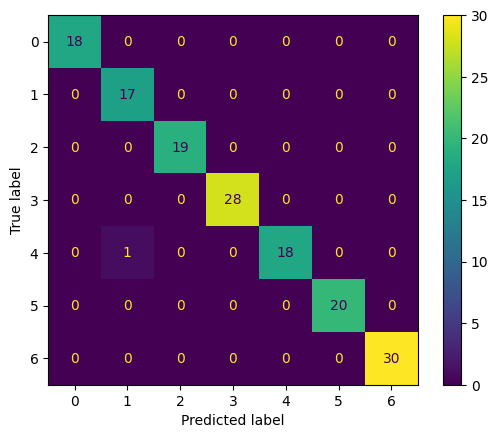

In [18]:
with open('dataset/validationset.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)
Y_pred = model.predict(X_valid)

#results
accuracy = accuracy_score(Y_valid, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_valid, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_valid, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()